# Ejercicio 1
## Triángulo de Sierpinski

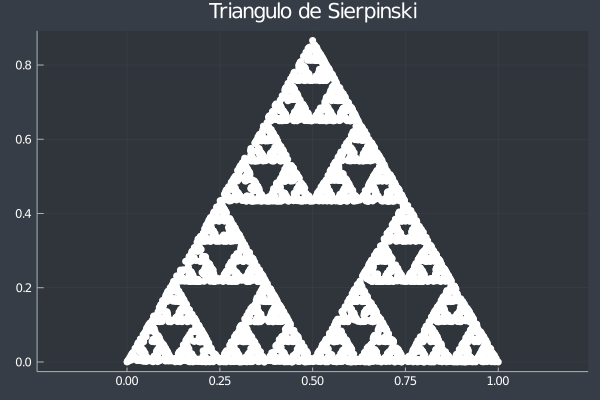

In [16]:
using Plots
theme(:dark)

#Coordenadas vértices del triángulo
A=(0,0)
B=(1,0)
C=(1/2,sqrt(3)/2)

#Arreglo de los vértices del triángulo
T=[A,B,C]

#Función punto medio
function m(x,y)
    return ((x[1]+y[1])*1/2,(x[2]+y[2])*1/2)
end

#Función iteraciones de los puntos del triángulo de Sierpinski

function s(n)
    scatter(T, color=:white, markerstrokecolor=:white)
    D=m(A,B)
    for i in 0:n-1
        D=m(D,rand(T))
        scatter!(D, color=:white, markerstrokecolor=:white)
    end
return scatter!(D,legend=false, title="Triangulo de Sierpinski", color=:white,markerstrokecolor=:white, aspect_ratio=:equal)
end

#Prueba de función
s(5000)

# Ejercicio 3
## Estimación de π

### Aproximación y gráfica de puntos

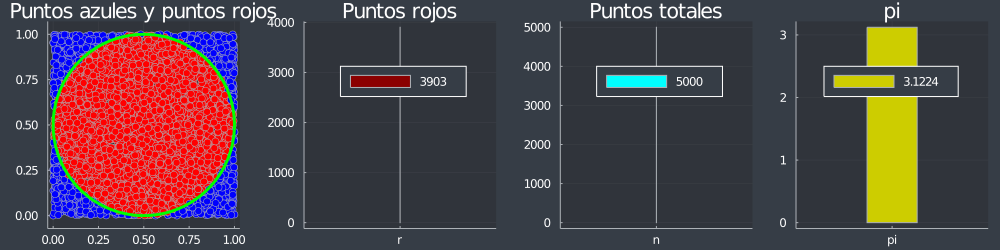

In [13]:
#Función para aproximar pi y graficar los puntos
function plot_pi(n)
r=0
scatter()
for i in 1:n #Iteración
    a=(rand(),rand())
        if (a[1]-0.5)^2 + (a[2]-0.5)^2 <= (1/4)
        r=r+1
        scatter!(a, color=:red)
        else
        scatter!(a, color=:blue)
        end
end

#Subgráficas

#Función círculo
function circle(h,k,r)
    θ=LinRange(0,2π,500)
    (h.+r*sin.(θ), k.+r*cos.(θ))
end

#Gráficas individuales
p1=scatter!(legend=false, title="Puntos azules y puntos rojos",aspect_ratio=:equal)
    plot!(circle(0.5,0.5,0.5),aspect_ratio=:equal, color=:lime, linewidth=3, legend=false)
p2=bar(["r"],[r], label=r, color=:red4, title="Puntos rojos",aspect_ratio=:equal)
p3=bar(["n"],[n], label=n, color=:cyan, title="Puntos totales",aspect_ratio=:equal)
p4=bar(["pi"],[4*(r/n)], color=:yellow3,label=4*(r/n), title="pi",aspect_ratio=:equal)
l = @layout [v u w r]
#Gráfica
return plot(p1,p2,p3,p4,layout =l,size=(1000,250))
end
#Prueba de función
plot_pi(5000)

### Promedio número de puntos para precisión

In [4]:
using Statistics

#Función para aproximar pi
function pi(n)
    R=0
    for i in 1:n #Iteración
        a=(rand(),rand())
            if (a[1]-0.5)^2 + (a[2]-0.5)^2 <= (1/4)
            R=R+1
            end
    end
    return 4*(R/n)
end

#Función para obtener el número mínimo de puntos para tener un error de ± 0.01
function min_n()
    j=1
    while abs(pi(j)-π) > 0.01
        j=j+1
    end
    return j
end

#Función para obtener el promedio del número mínimo de puntos para tener un error de ± 0.01, promedio después de w intentos
function prom(w)

P=fill(Int64(0), (w))
    for i in 1:w
        P[i]=min_n()
    end
return mean(P)
end

#Prueba de función
prom(1000000)

41.485009

Por lo tanto, en promedio se necesitan aproximadamente 42 puntos para tener una precisión de π de ± 0.01.

### Gráfica del error de la estimación en función del número de puntos

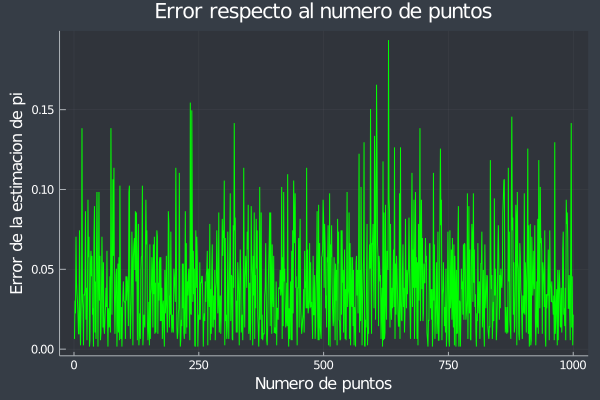

In [15]:
#Función del error respecto al número de puntos
function error(z)
E=fill(Float64(0), (z))
    for i in 1:z
        E[i]=abs(pi(z)-π)
    end
plot(E, legend=false, color=:green1, title="Error respecto al numero de puntos", xaxis="Numero de puntos", yaxis="Error de la estimacion de pi")
end
#Prueba de función
error(1000)